**问题1求解**

Ⅰ）电脑生成多条布朗运动（BM）轨道；

Ⅱ）探究布朗运动轨道的一阶变差、二阶变差的轨道，有什么发现？


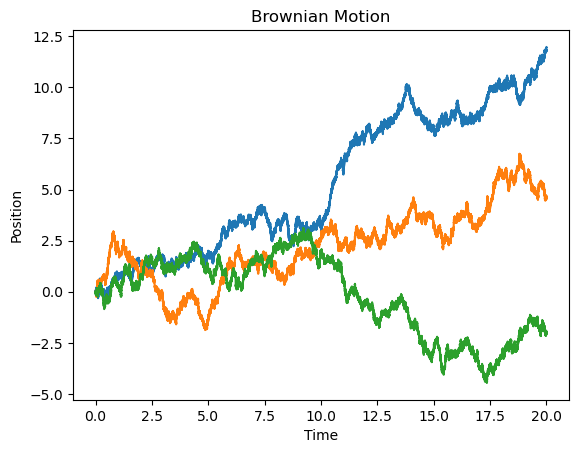

In [8]:
import numpy as np
import matplotlib.pyplot as plt

#定义布朗运动函数
#生成N条布朗运动轨迹，时间间隔为dt，总时间为T，从位置x0开始运动
def brownian_motion(N, T, dt, x0):

    #在[0,T]上生成等间隔的时间点，每个时间点的间隔为dt
    t = np.linspace(0, T, int(T/dt)+1)

    #生成一个N*len(t)的矩阵，每行是一个时间点的随机增量，每列是一条轨迹的随机增量
    #每个随机增量都是一个均值为0，标准差为sqrt(dt)的正态分布随机数
    dW = np.random.normal(scale=np.sqrt(dt), size=(N, len(t)))

    W = np.cumsum(dW, axis=1)#对每条轨迹进行累加
    X = x0 + W
    return t, X

#定义图像参数
N = 3
T = 20 
dt = 0.0001 
x0 = 0 

#生成布朗运动数据
t, X = brownian_motion(N, T, dt, x0)
fig,ax=plt.subplots()

#绘制布朗运动图像
for i in range(N):
    ax.plot(t, X[i])
ax.set_xlabel('Time')
ax.set_ylabel('Position')
plt.title('Brownian Motion')
plt.savefig('rp1-1-1.png',dpi=100,facecolor='#f1f1f1')

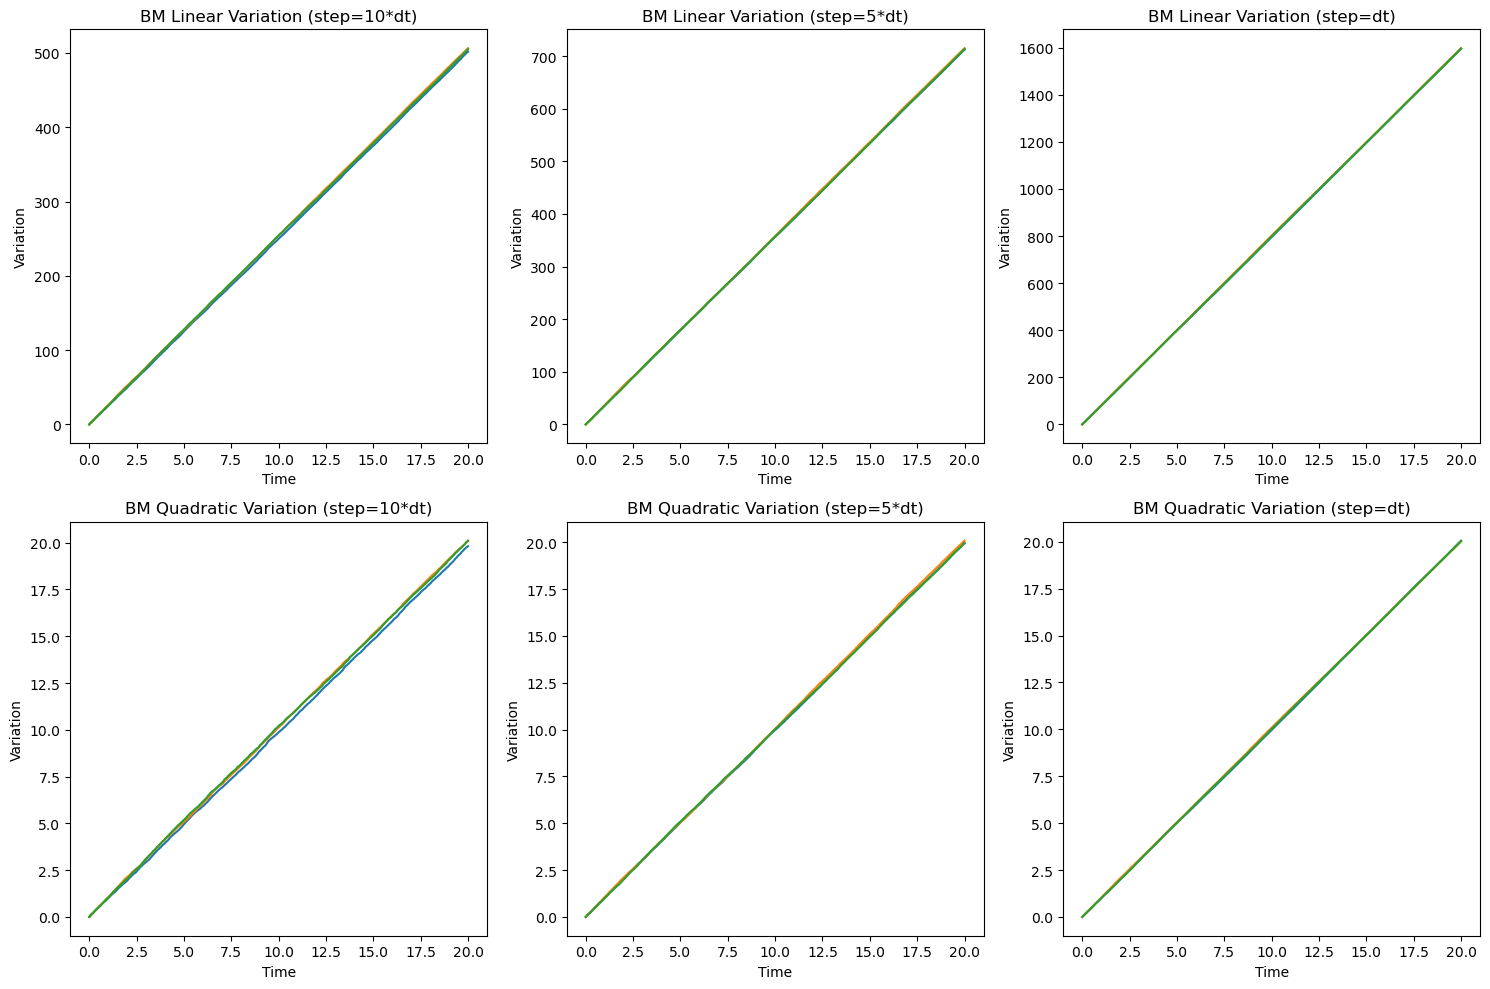

In [9]:
#变差步长=10*dt
Y = X[:,::10]
t1 = t[::10]

#计算一阶变差
dY1 = np.abs(np.diff(Y, axis=1))
dY1 = np.hstack([np.zeros((N,1)), dY1])
Y_sum1 = np.cumsum(dY1, axis=1)

#计算二阶变差
dY2 = np.abs(np.diff(Y, axis=1))
dY2 = dY2**2
dY2 = np.hstack([np.zeros((N,1)), dY2])
Y_sum2 = np.cumsum(dY2, axis=1)

#--------------------------#

#变差步长=5*dt
Z = X[:,::5]
t2 = t[::5]

#计算一阶变差
dZ1 = np.abs(np.diff(Z, axis=1))
dZ1 = np.hstack([np.zeros((N,1)), dZ1])
Z_sum1 = np.cumsum(dZ1, axis=1)

#计算二阶变差
dZ2 = np.abs(np.diff(Z, axis=1))
dZ2 = dZ2**2
dZ2 = np.hstack([np.zeros((N,1)), dZ2])
Z_sum2 = np.cumsum(dZ2, axis=1)

#--------------------------#

#变差步长=dt

#计算一阶变差
dX1 = np.abs(np.diff(X, axis=1))
dX1 = np.hstack([np.zeros((N,1)), dX1])
X_sum1 = np.cumsum(dX1, axis=1)

#计算二阶变差
dX2 = np.abs(np.diff(X, axis=1))
dX2 = dX2**2
dX2 = np.hstack([np.zeros((N,1)), dX2])
X_sum2 = np.cumsum(dX2, axis=1)

#--------------------------#
fig, ax = plt.subplots(2, 3, figsize=(15, 10))  # 创建2行3列的子图

# 第一列
for i in range(N):
    ax[0, 0].plot(t1, Y_sum1[i])
    ax[1, 0].plot(t1, Y_sum2[i])
ax[0, 0].set_title('BM Linear Variation (step=10*dt)')  
ax[1, 0].set_title('BM Quadratic Variation (step=10*dt)')  

# 第二列
for i in range(N):
    ax[0, 1].plot(t2, Z_sum1[i])
    ax[1, 1].plot(t2, Z_sum2[i])
ax[0, 1].set_title('BM Linear Variation (step=5*dt)')  
ax[1, 1].set_title('BM Quadratic Variation (step=5*dt)')  

# 第三列
for i in range(N):
    ax[0, 2].plot(t, X_sum1[i])
    ax[1, 2].plot(t, X_sum2[i])
ax[0, 2].set_title('BM Linear Variation (step=dt)')  
ax[1, 2].set_title('BM Quadratic Variation (step=dt)')  

for a in ax.flat:
    a.set(xlabel='Time', ylabel='Variation')

plt.tight_layout()  
plt.savefig('rp1-2-1.png', dpi=500, facecolor='#f1f1f1')